# Analyzing the trends of COVID-19 with Python

In [1]:
# Study and analyze various trends of Covid19
# FB Prophet library --> We don't have to worry about stationarity or seasonality
# Plotly --> It plots a globe like graph(choropleth)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
df.rename(columns = {
    "Province/State" : "state",
    "Country/Region" : "country",
    "Lat" : "lat",
    "Long" : "long",
    "Confirmed" : "confirmed",
    "Deaths" : "deaths",
    "Recovered" : "recovered",
    "Date" : "date"
}, inplace = True)

In [13]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [14]:
df["active"] = df["confirmed"] - df["deaths"] - df["recovered"]

In [16]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [17]:
top = df[df['date'] == df['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,9796
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe,1991
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa,7973
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe,52
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa,667
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [18]:
world = top.groupby("country")["active", "confirmed", "deaths"].sum().reset_index()
world

,country,active,confirmed,deaths
0,Afghanistan,9796,36263,1269
1,Albania,1991,4880,144
2,Algeria,7973,27973,1163
3,Andorra,52,907,52
4,Angola,667,950,41
...,...,...,...,...
182,West Bank and Gaza,6791,10621,78
183,Western Sahara,1,10,1
184,Yemen,375,1691,483
185,Zambia,1597,4552,140


In [22]:
top["country"].value_counts()

China             33
Canada            12
France            11
United Kingdom    11
Australia          8
                  ..
Holy See           1
Honduras           1
Hungary            1
Iceland            1
Lesotho            1
Name: country, Length: 187, dtype: int64

In [25]:
world["active"].max()

2816444

In [28]:
figure = px.choropleth(world, locations="country",locationmode="country names", 
                       color="active", color_continuous_scale="reds", hover_name="country",
                       range_color=[1,100000],title="Contries with all active cases")
figure.show()

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total Cases')]

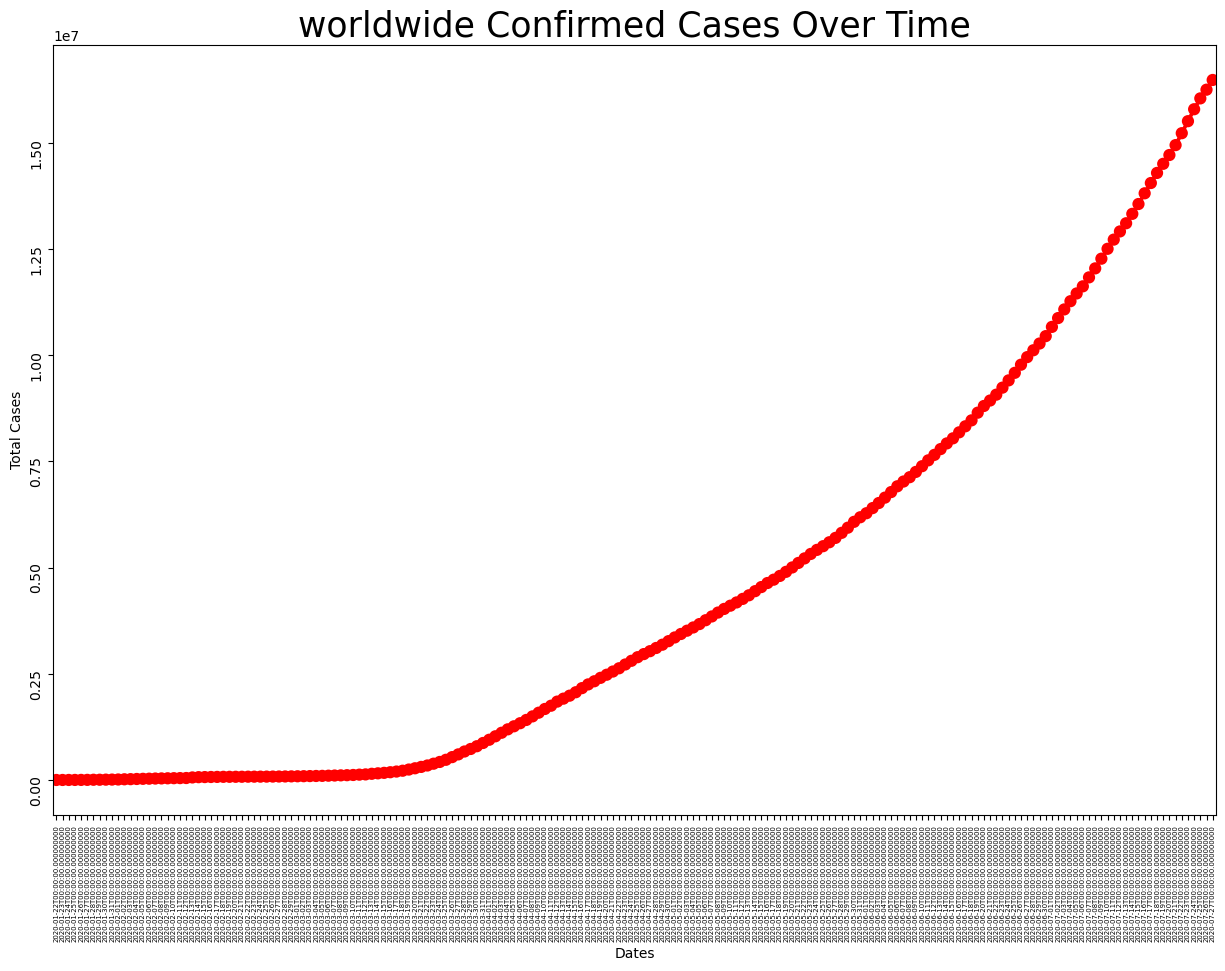

In [29]:
# Trend of how covid spreaded
plt.figure(figsize=(15, 10))
plt.xlabel("Dates", fontsize=10)
plt.ylabel("Total Cases", fontsize=10)
plt.xticks(rotation=90,fontsize=5)
plt.yticks(fontsize=10, rotation=90)
plt.title("worldwide Confirmed Cases Over Time", fontsize=25)
total_cases = df.groupby("date")["date", "confirmed"].sum().reset_index()
total_cases["date"] = pd.to_datetime(total_cases["date"])

ax = sns.pointplot(x = total_cases.date, y = total_cases.confirmed, color="r")
ax.set(xlabel="Dates", ylabel="Total Cases")

In [30]:
top

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,9796
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe,1991
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa,7973
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe,52
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa,667
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [31]:
top_actives = top.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total Active Cases'), Text(0, 0.5, 'Country')]

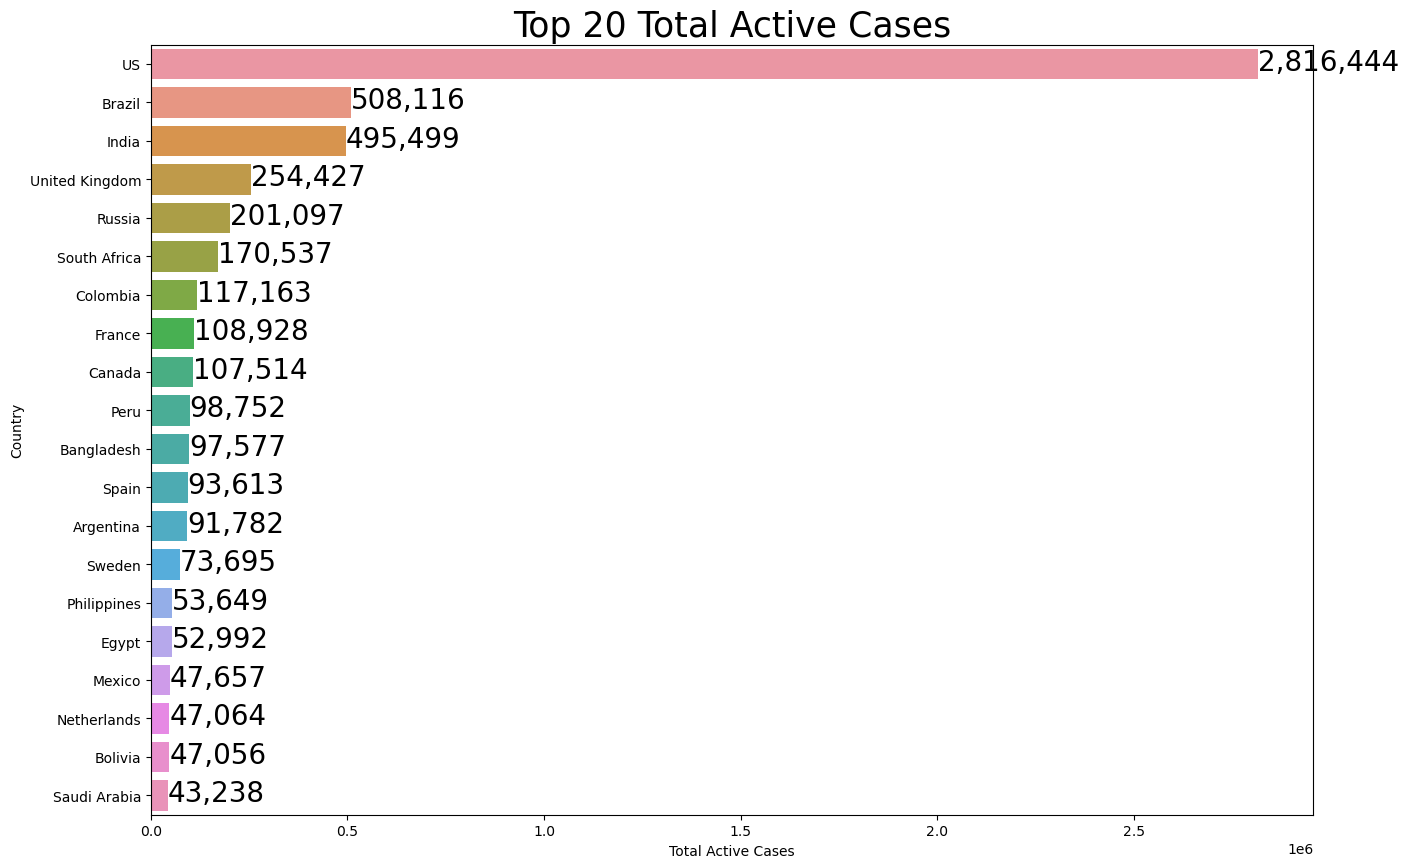

In [32]:
plt.figure(figsize=(15, 10))
plt.xlabel("Total Active Case", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Top 20 Total Active Cases", fontsize=25)

ax = sns.barplot(x=top_actives.active, y=top_actives.country)

for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size = 20, ha="left", va="center")
    
ax.set(xlabel="Total Active Cases", ylabel="Country")

In [33]:
# Top Deaths Cases
top_deaths = top.groupby("country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


[Text(0.5, 0, 'Total Death Cases'), Text(0, 0.5, 'Country')]

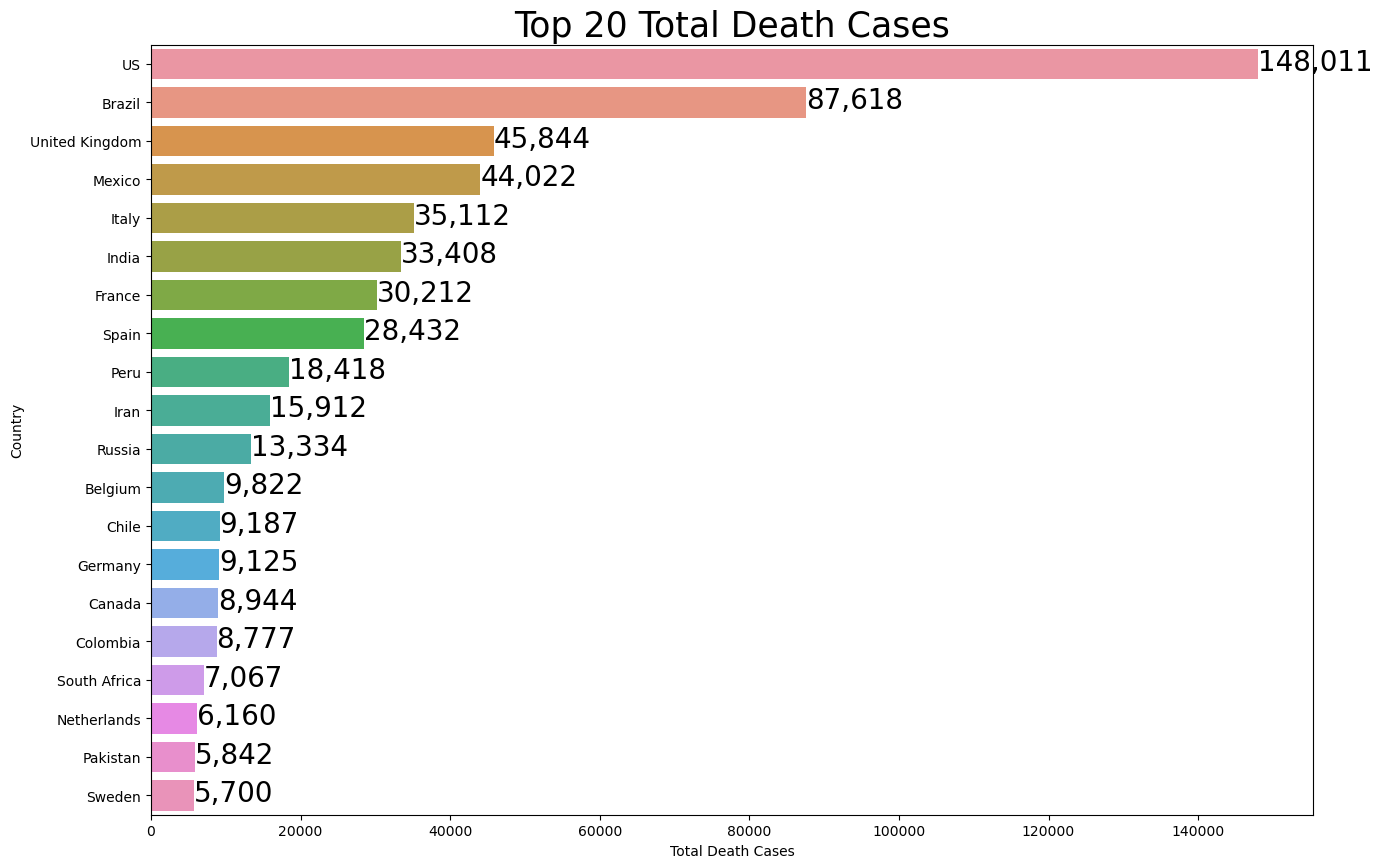

In [34]:
plt.figure(figsize=(15, 10))
plt.xlabel("Total Death Case", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Top 20 Total Death Cases", fontsize=25)

ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)

for i, (value, name) in enumerate(zip(top_deaths.deaths, top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size = 20, ha="left", va="center")
    
ax.set(xlabel="Total Death Cases", ylabel="Country")

In [35]:
# Recoverd Cases
top_recovered = top.groupby("country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
top_recovered

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


[Text(0.5, 0, 'Total Recovered Cases'), Text(0, 0.5, 'Country')]

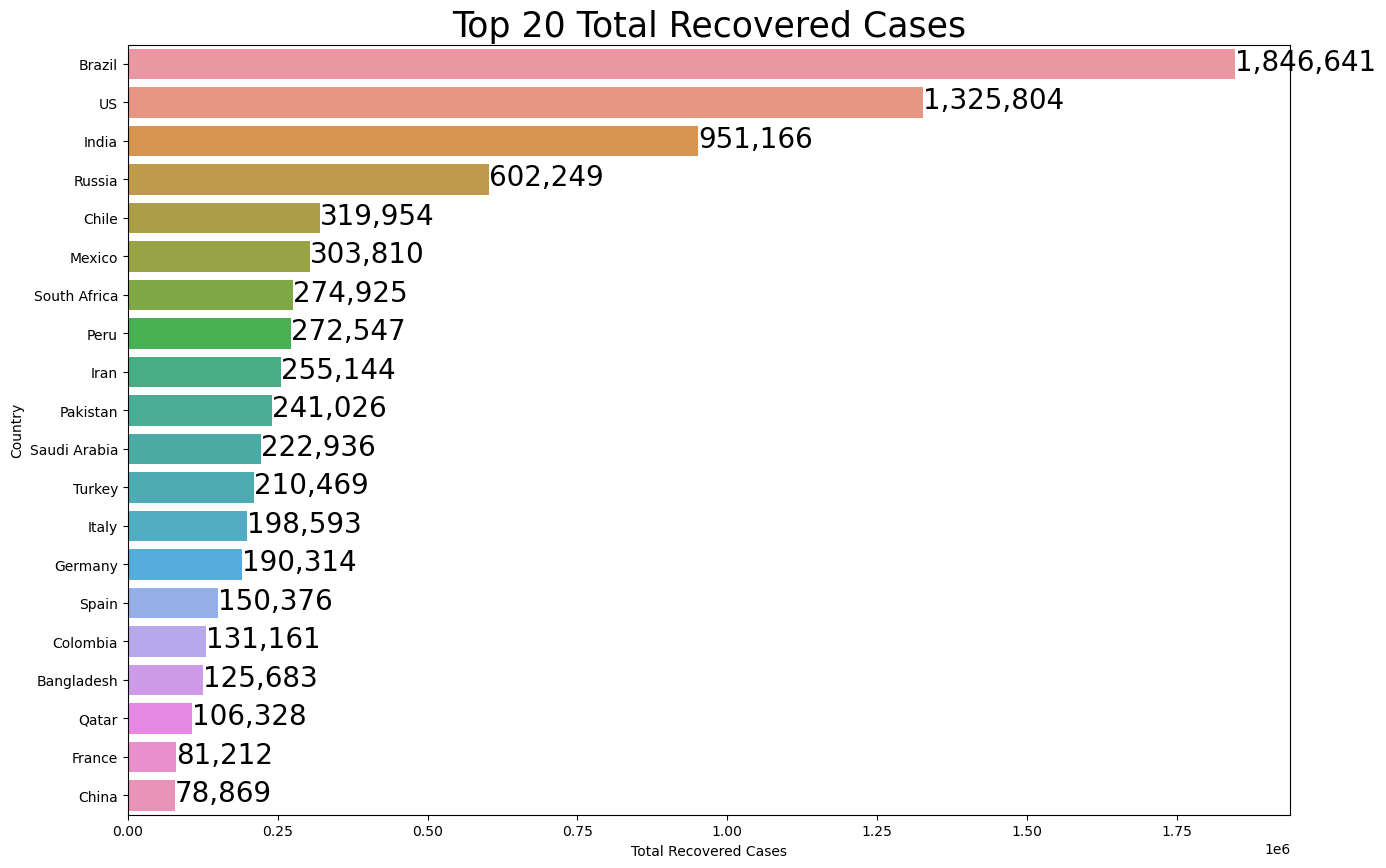

In [36]:
plt.figure(figsize=(15, 10))
plt.xlabel("Total Recovered Case", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Top 20 Total Recovered Cases", fontsize=25)

ax = sns.barplot(x=top_recovered.recovered, y=top_recovered.country)

for i, (value, name) in enumerate(zip(top_recovered.recovered, top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size = 20, ha="left", va="center")
    
ax.set(xlabel="Total Recovered Cases", ylabel="Country")

In [38]:
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby("date")["recovered", "deaths", "confirmed", "active"].sum().reset_index()
brazil

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [40]:
us = df[df.country == "US"]
us = us.groupby("date")["recovered", "deaths", "confirmed", "active"].sum().reset_index()
us

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [41]:
uk = df[df.country == "United Kingdom"]
uk = uk.groupby("date")["recovered", "deaths", "confirmed", "active"].sum().reset_index()
uk

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1425,45639,298731,251667
184,2020-07-24,1425,45762,299500,252313
185,2020-07-25,1427,45823,300270,253020
186,2020-07-26,1434,45837,301020,253749


In [42]:
india = df[df.country == "India"]
india = india.groupby("date")["recovered", "deaths", "confirmed", "active"].sum().reset_index()
india

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,30601,1288108,440298
184,2020-07-24,849432,31358,1337024,456234
185,2020-07-25,885573,32060,1385635,468002
186,2020-07-26,917568,32771,1435616,485277


In [43]:
russia = df[df.country == "Russia"]
russia = russia.groupby("date")["recovered", "deaths", "confirmed", "active"].sum().reset_index()
russia

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,579295,12873,793720,201552
184,2020-07-24,587728,13026,799499,198745
185,2020-07-25,596064,13172,805332,196096
186,2020-07-26,599172,13249,811073,198652


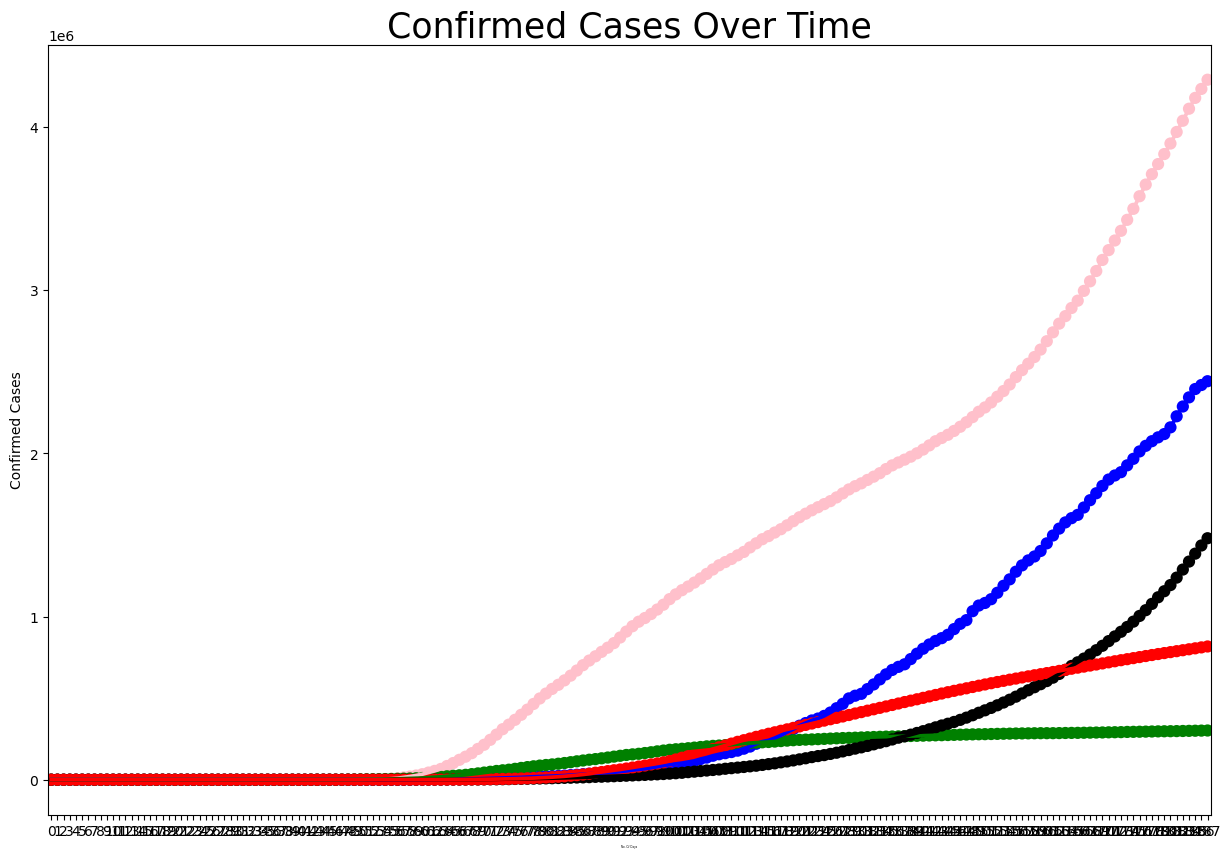

In [45]:
plt.figure(figsize=(15, 10))
sns.pointplot(brazil.index, brazil.confirmed, color="Blue")
sns.pointplot(us.index, us.confirmed, color="Pink")
sns.pointplot(uk.index, uk.confirmed, color="Green")
sns.pointplot(india.index, india.confirmed, color="Black")
sns.pointplot(russia.index, russia.confirmed, color="Red")
plt.xlabel("No. Of Days", fontsize=2)
plt.ylabel("Confirmed Cases", fontsize=10)
plt.title("Confirmed Cases Over Time", fontsize=25)

plt.show()

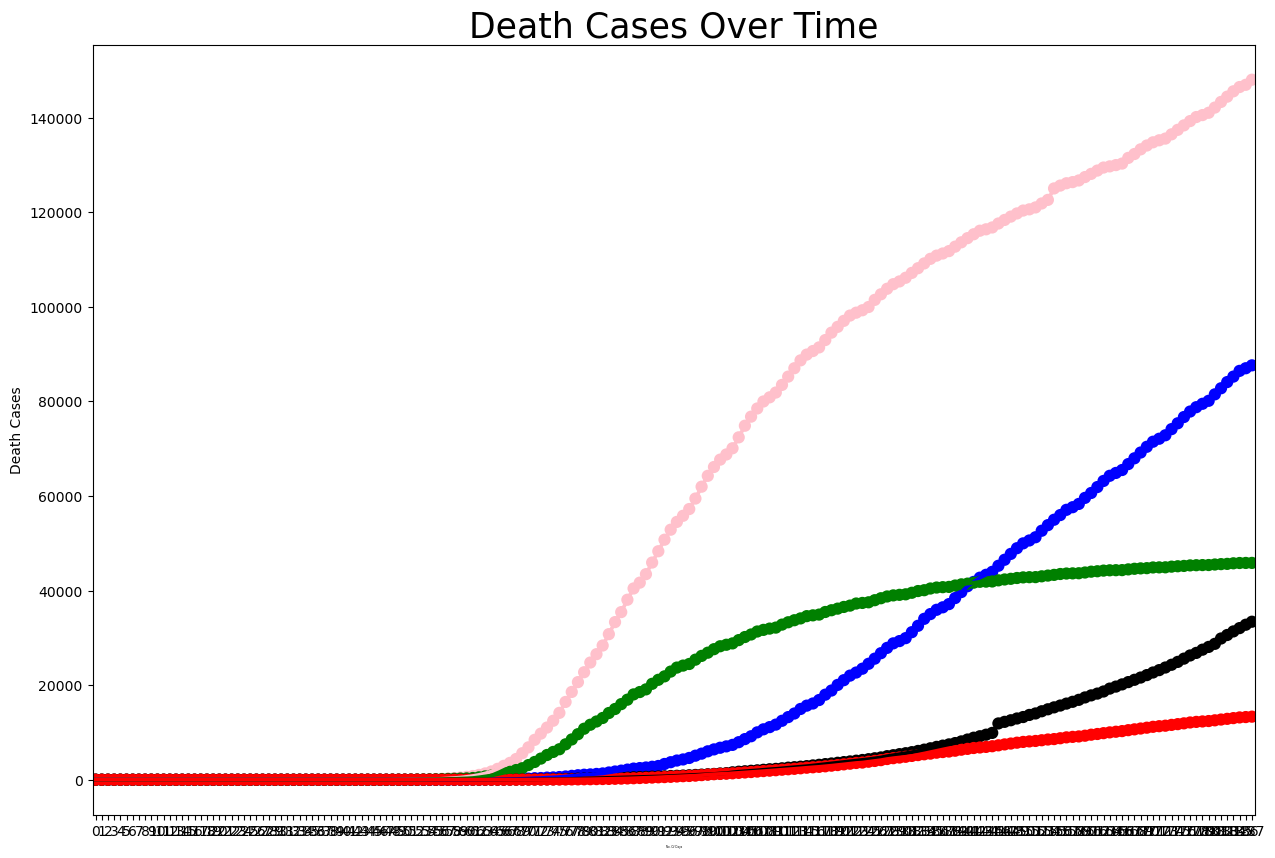

In [46]:
plt.figure(figsize=(15, 10))
sns.pointplot(brazil.index, brazil.deaths, color="Blue")
sns.pointplot(us.index, us.deaths, color="Pink")
sns.pointplot(uk.index, uk.deaths, color="Green")
sns.pointplot(india.index, india.deaths, color="Black")
sns.pointplot(russia.index, russia.deaths, color="Red")
plt.xlabel("No. Of Days", fontsize=2)
plt.ylabel("Death Cases", fontsize=10)
plt.title("Death Cases Over Time", fontsize=25)

plt.show()

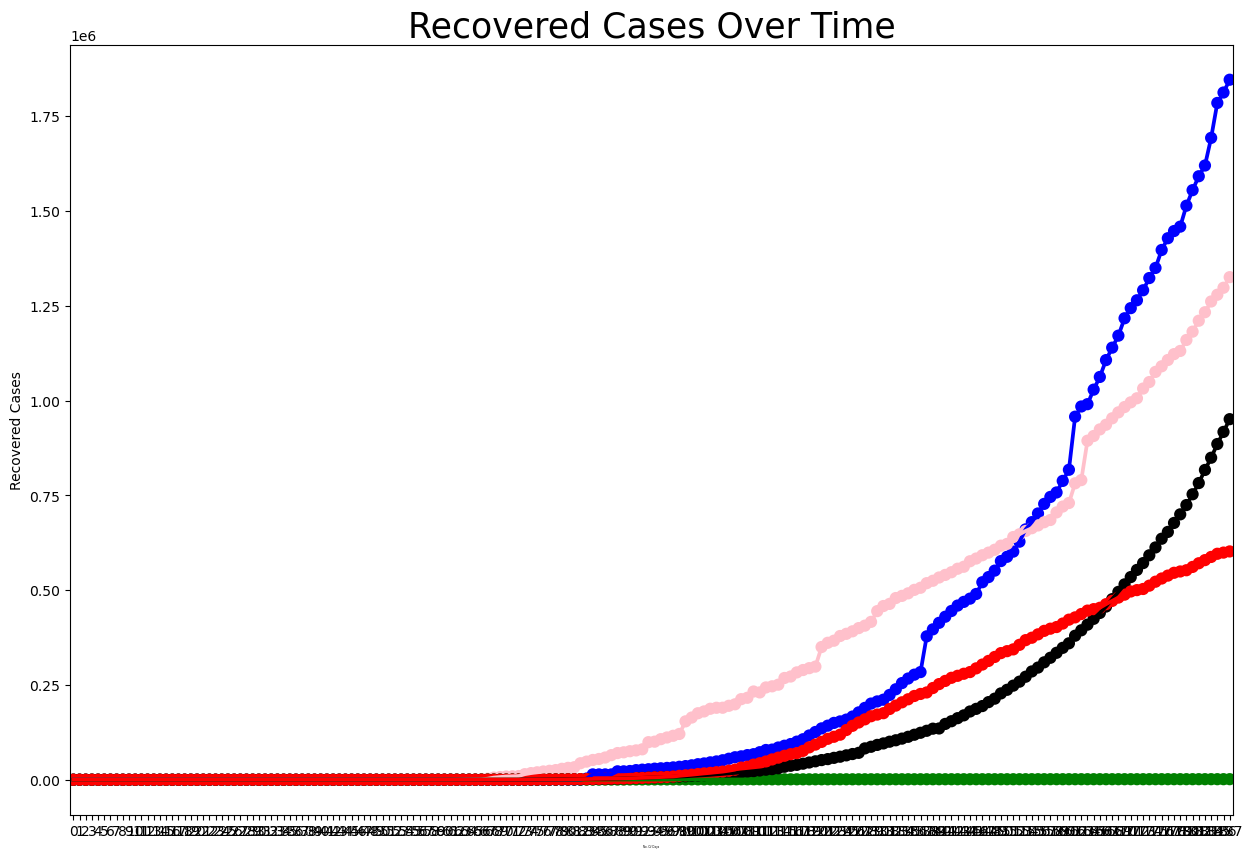

In [47]:
plt.figure(figsize=(15, 10))
sns.pointplot(brazil.index, brazil.recovered, color="Blue")
sns.pointplot(us.index, us.recovered, color="Pink")
sns.pointplot(uk.index, uk.recovered, color="Green")
sns.pointplot(india.index, india.recovered, color="Black")
sns.pointplot(russia.index, russia.recovered, color="Red")
plt.xlabel("No. Of Days", fontsize=2)
plt.ylabel("Recovered Cases", fontsize=10)
plt.title("Recovered Cases Over Time", fontsize=25)

plt.show()

In [48]:
! pip install prophet

     ---------------------------------------- 13.3/13.3 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 869.8/869.8 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 93.0/93.0 kB 1.8 MB/s eta 0:00:00


In [50]:
from prophet import Prophet

In [51]:
import os
os

<module 'os' from 'C:\\Users\\saura\\anaconda3\\lib\\os.py'>

In [52]:
data = pd.read_csv("covid_19_clean_complete.csv", parse_dates=["Date"])

In [53]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [54]:
total_active = data["Active"].sum()

In [55]:
total_active

396715350

In [56]:
data["Active"] = data["Confirmed"] - data["Deaths"] - data["Recovered"]

In [57]:
total_active = data["Active"].sum()
total_active

396715350

In [61]:
confirmed = data.groupby("Date").sum()["Confirmed"].reset_index()
deaths=data.groupby('Date').sum()['Deaths'].reset_index()
recovered=data.groupby('Date').sum()['Recovered'].reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [62]:
deaths.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [63]:
# For building a forecasting model using fbProphet library,
# there should be only 2 columns passed
# The column names should always be --> 'ds','y'

confirmed.columns = ["ds", "y"]
confirmed["ds"] = pd.to_datetime(confirmed["ds"])

In [64]:
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [65]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)

future = m.make_future_dataframe(periods=7)
future.tail(7)

20:54:03 - cmdstanpy - INFO - Chain [1] start processing
20:54:03 - cmdstanpy - INFO - Chain [1] done processing


,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [66]:
forecast = m.predict(future)
forecast.tail(7)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632401e+07,1.616247e+07,1.648341e+07
189,2020-07-29,1.653405e+07,1.637436e+07,1.669157e+07
190,2020-07-30,1.674820e+07,1.657396e+07,1.690286e+07
191,2020-07-31,1.696362e+07,1.679205e+07,1.712651e+07
192,2020-08-01,1.717143e+07,1.700592e+07,1.734989e+07
193,2020-08-02,1.736922e+07,1.719427e+07,1.755190e+07
194,2020-08-03,1.756410e+07,1.739229e+07,1.773884e+07


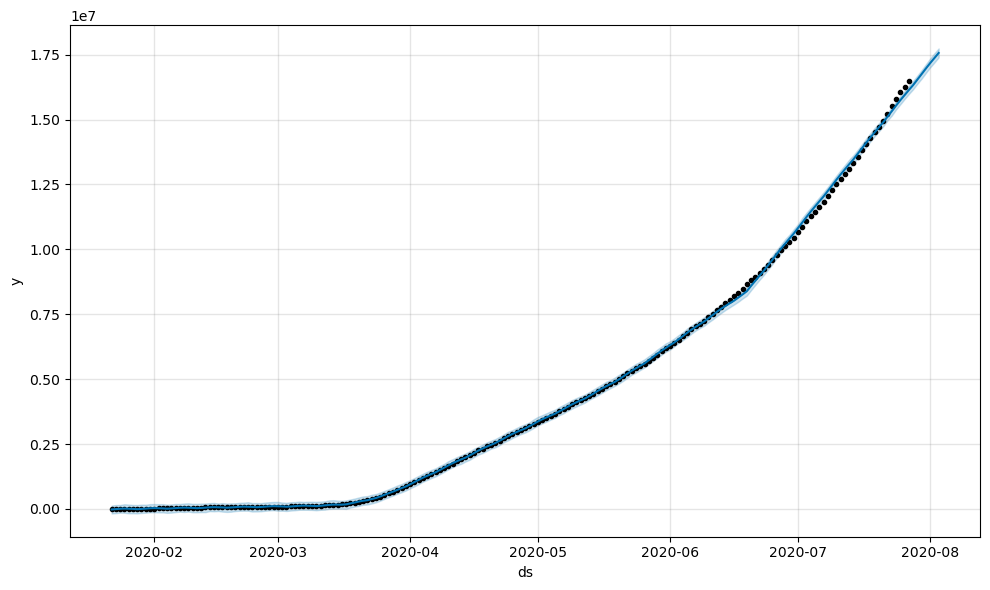

In [67]:
confirmed_forecast_plot = m.plot(forecast)

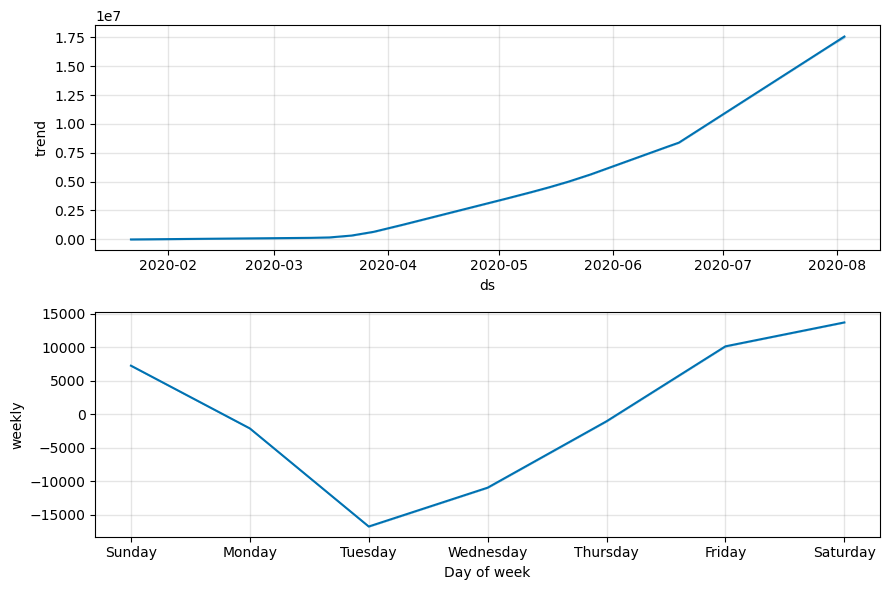

In [68]:
confirmed_forecast_plot1 = m.plot_components(forecast)

In [69]:
recovered=data.groupby('Date').sum()['Recovered'].reset_index()
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [70]:
recovered.columns = ["ds", "y"]
recovered["ds"] = pd.to_datetime(recovered["ds"])

In [71]:
m = Prophet(interval_width=0.95)
m.fit(recovered)

future = m.make_future_dataframe(periods=7)
future.tail(7)

21:04:02 - cmdstanpy - INFO - Chain [1] start processing
21:04:02 - cmdstanpy - INFO - Chain [1] done processing


,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [72]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,9.313528e+06,9.198815e+06,9.432553e+06
189,2020-07-29,9.455717e+06,9.341752e+06,9.586418e+06
190,2020-07-30,9.598531e+06,9.478995e+06,9.711500e+06
191,2020-07-31,9.740095e+06,9.619627e+06,9.862949e+06
192,2020-08-01,9.880394e+06,9.757683e+06,1.000409e+07
193,2020-08-02,1.000646e+07,9.872983e+06,1.013644e+07
194,2020-08-03,1.014305e+07,9.996821e+06,1.028424e+07


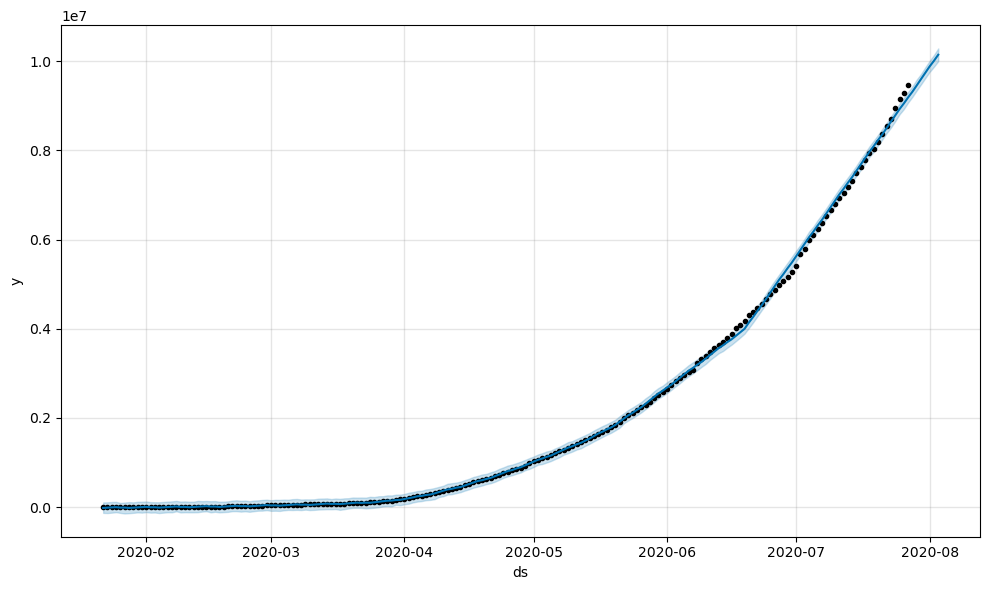

In [73]:
recovered_forecast_plot = m.plot(forecast)

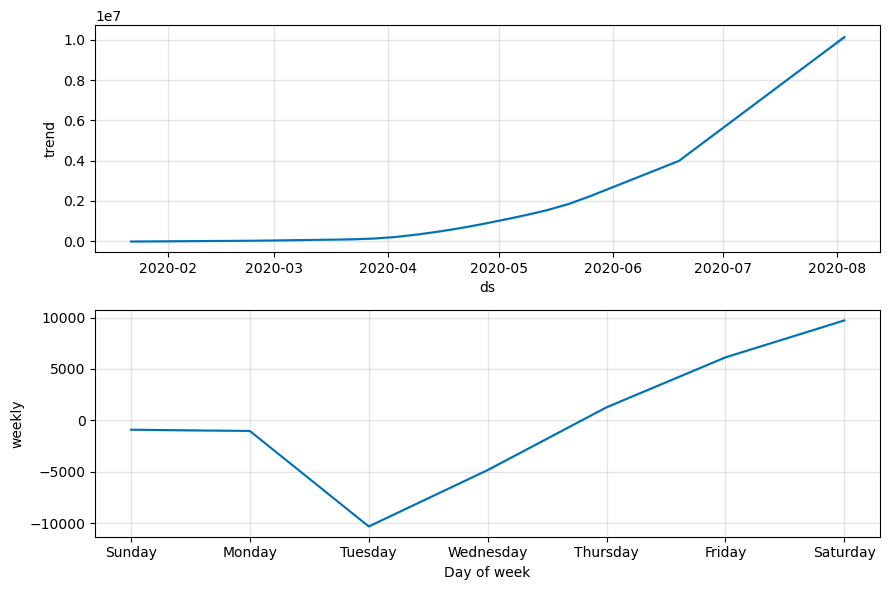

In [74]:
recovered_forecast_plot1 = m.plot_components(forecast)

In [75]:
deaths=data.groupby('Date').sum()['Deaths'].reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [76]:
deaths.columns = ["ds", "y"]
deaths["ds"] = pd.to_datetime(deaths["ds"])

In [77]:
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [78]:
m = Prophet(interval_width=0.95)

m.fit(deaths)

future = m.make_future_dataframe(periods=7)
future.tail(7)

21:10:24 - cmdstanpy - INFO - Chain [1] start processing
21:10:24 - cmdstanpy - INFO - Chain [1] done processing


,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [79]:
forecast = m.predict(future)

In [80]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652342.857217,649405.925324,655316.095972
189,2020-07-29,657910.776693,654905.557556,660816.286068
190,2020-07-30,663521.743356,660366.190347,666648.526323
191,2020-07-31,669038.962960,665644.052204,672669.181142
192,2020-08-01,673922.465056,670262.593037,677775.564064
193,2020-08-02,678060.469456,673637.147311,682033.434820
194,2020-08-03,682351.854619,677185.189897,687439.851297


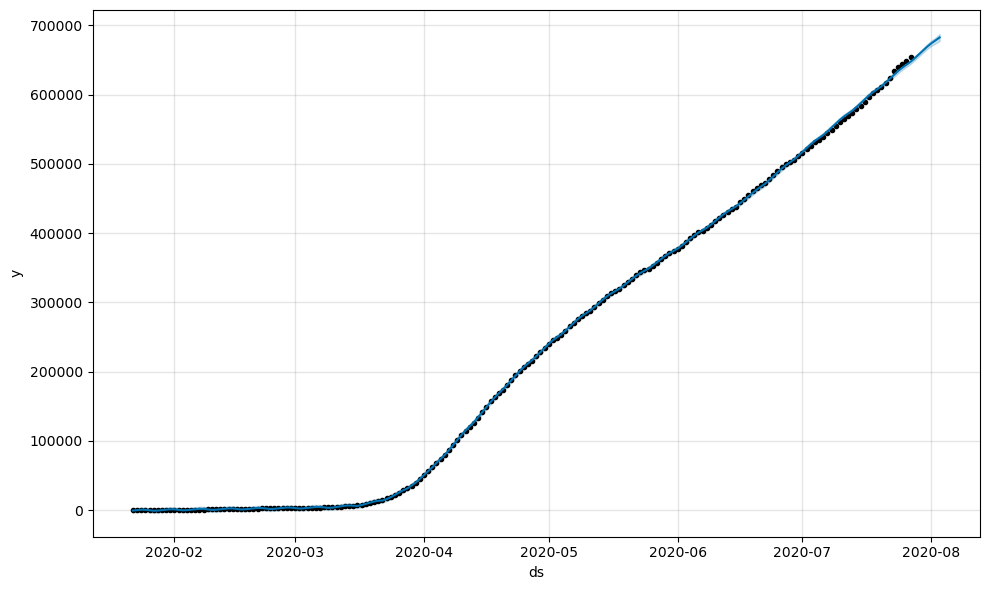

In [81]:
deaths_forecast_plot = m.plot(forecast)

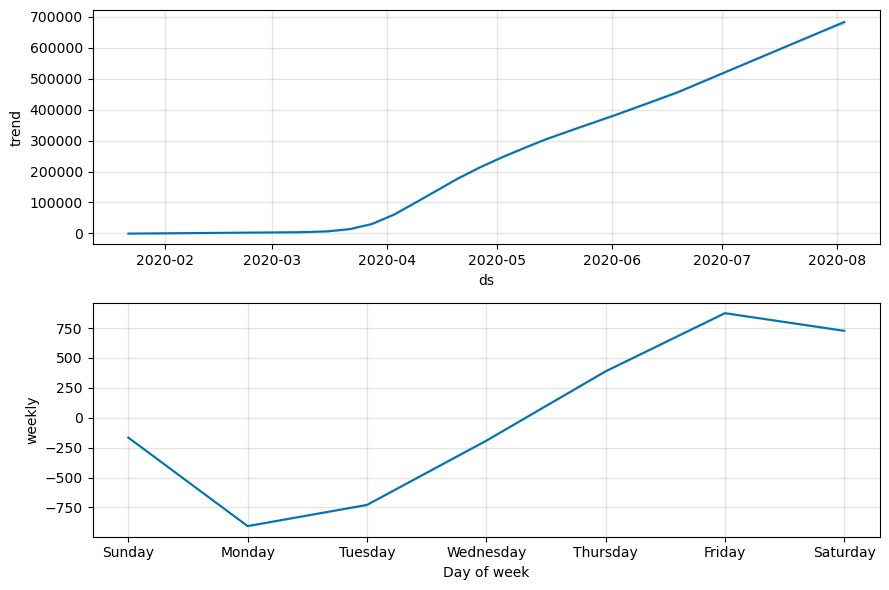

In [82]:
deaths_forecast_plot1 = m.plot_components(forecast)